In [1]:
import time
import datetime as dt

def epoch_to_millis(epoch):
    
    datetime_time = dt.datetime.fromtimestamp(epoch)
    s = (datetime_time - dt.datetime(1970, 1, 1)).total_seconds()-3600
               
    return s
    

In [2]:
#import e parsing file di log
import pandas as pd



def start(path):
    
    file = open(path, 'r')
    Lines = file.readlines()
    
    return Lines

def rmse_distance(Lines):
    
    coppie = []

    for line in Lines:
        
        if 'COUPLE(N_ITER,DISTANCE RMSE)' in line:
            split = line.split(':')
            s = split[3].replace('[','')
            s = s.replace('(','')
            s = s.replace(')','')
            s = s.replace(']','')
            s = s.split(',')
            a = int(s[0])
            b = float(s[1])
            coppie.append((a,b))          
        
    return coppie


def execution_time_gurobi(Lines):
    
    for line in Lines:
        
        if 'TEMPO_ESECUZIONE GUROBI' in line:
            split = line.split(':')
            
    return epoch_to_millis(float(split[3]))
    
    
def execution_time_tensorflow(Lines):
    
    for line in Lines:
        if 'TEMPO_ESECUZIONE TENSORFLOW' in line:
            split = line.split(':')
            
    return epoch_to_millis(float(split[3]))


def time_per_iter(Lines):
    
    coppie = []

    for line in Lines:
        
        if 'TEMPO PER ITERAZIONI (N_ITER,TEMPO) TENSORFLOW' in line:
            split = line.split(':')
            s = split[3].replace('[','')
            s = s.replace('(','')
            s = s.replace(')','')
            s = s.replace(']','')
            s = s.split(',')
            a = int(s[0])
            b = epoch_to_millis(float(s[1]))
            coppie.append((a,b))          
        
    return coppie


In [3]:
#funzione per graficare

import matplotlib.pyplot as plt

def graph_rmse_distance(coppie):

    x_val = [x[0] for x in coppie]
    y_val = [x[1] for x in coppie]

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(x_val,y_val)
    ax.plot(x_val,y_val,'or')
    
    ax.set_title('Rmse Distance per number of iterations')
    
    ax.set_ylabel('RMSE Distance (Gurobi -TensorFlow)')
    ax.set_xlabel('Number of Iterations')

    return plt.show()

def graph_time_per_iter(coppie):

    x_val = [x[0] for x in coppie]
    y_val = [x[1] for x in coppie]

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(x_val,y_val)
    ax.plot(x_val,y_val,'or')
    
    
    ax.set_title('Time Tensorflow per Number of Iterations')
    ax.set_ylabel('Total Time Tensorflow)')
    ax.set_xlabel('Number of Iteration')

    return plt.show()

def graph_rmse_distance_and_execution_time(couples_rmse, couples_time):
    
    x1 = [x[0] for x in couples_rmse]
    x2 = [x[0] for x in couples_time]

    y1 = [x[1] for x in couples_rmse]
    y2 = [x[1] for x in couples_time]
    
    plt.subplot(2, 1, 1)
    plt.plot(x1, y1, 'ko-')
    plt.title('Rmse Distance per Number of Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('RMSE Distance (Gurobi -TensorFlow)')


    plt.subplot(2, 1, 2)
    plt.plot(x2, y2, 'r.-')
    plt.title('Time Tensorflow per Number of Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Total Time Tensorflow)')
    return plt.show()


In [4]:
#funzione per tabella

def tab_rmse_distance(coppie):
    
    print ("N_ITER        RMSE_DISTANCE")
    for i in coppie:
        print ("{:<14}{:<11}".format(*i))

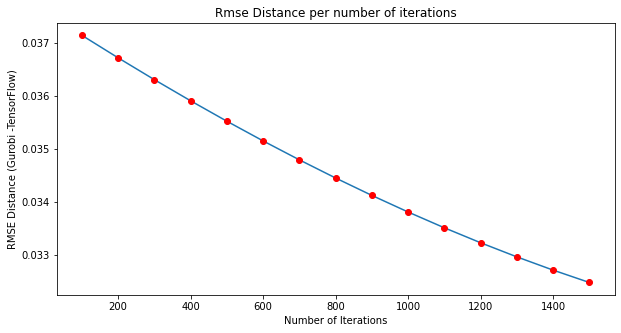

N_ITER        RMSE_DISTANCE
100           0.037138546729723165
200           0.03671472421869325
300           0.03630369067467278
400           0.03590577061332452
500           0.03552128225430652
600           0.03515060210786453
700           0.034794075134686436
800           0.03445189149487252
900           0.034124411176690385
1000          0.033811895238140786
1100          0.03351459438260582
1200          0.03323288562240286
1300          0.03296716882899062
1400          0.032717679341304665
1500          0.03248454866032636


In [5]:
path = "../../../log/Prove-4/Virginica/c1_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


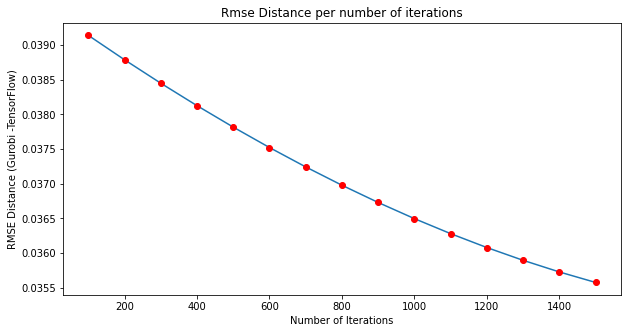

N_ITER        RMSE_DISTANCE
100           0.039141079373177026
200           0.03878891143063696
300           0.03845083603617274
400           0.038127094483231816
500           0.03781782952528703
600           0.037523244098064144
700           0.03724368586376664
800           0.03697944634954052
900           0.03673073128471789
1000          0.03649785129828334
1100          0.03628110791862123
1200          0.036080637592400516
1300          0.035896512929126545
1400          0.03572873904664129
1500          0.03557740837270075


In [6]:
path = "../../../log/Prove-4/Virginica/c1_sigma01_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

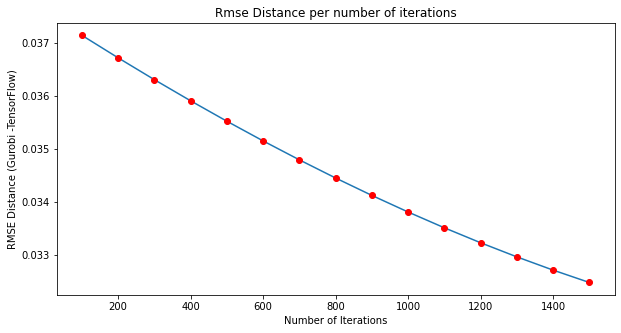

N_ITER        RMSE_DISTANCE
100           0.037138546729723165
200           0.03671472421869325
300           0.03630369067467278
400           0.03590577061332452
500           0.03552128225430652
600           0.03515060210786453
700           0.034794075134686436
800           0.03445189149487252
900           0.034124411176690385
1000          0.033811895238140786
1100          0.03351459438260582
1200          0.03323288562240286
1300          0.03296716882899062
1400          0.032717679341304665
1500          0.03248454866032636


In [7]:
path = "../../../log/Prove-4/Virginica/c1_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

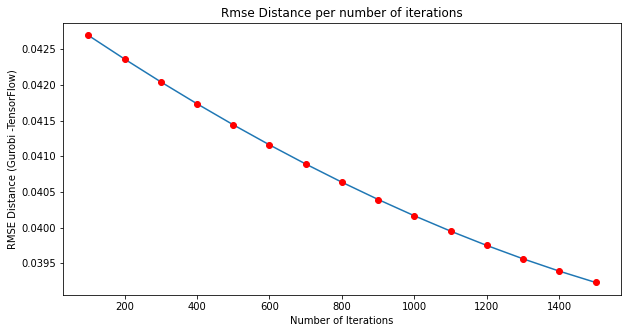

N_ITER        RMSE_DISTANCE
100           0.042694645041101584
200           0.04236257391229139
300           0.04204275556977076
400           0.04173545737280846
500           0.04144095774120196
600           0.04115940440499506
700           0.040890823978758935
800           0.04063535477048052
900           0.04039322761821299
1000          0.040164560213329155
1100          0.039949548118875924
1200          0.03974841296404941
1300          0.03956136359184834
1400          0.039388598449889206
1500          0.03923030431433314


In [8]:
path = "../../../log/Prove-4/Setosa/c1_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


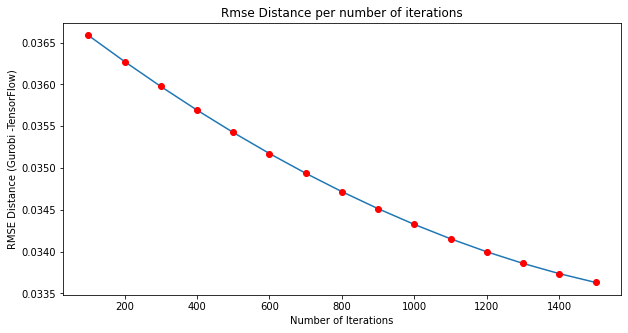

N_ITER        RMSE_DISTANCE
100           0.03658637900533271
200           0.036273464226459246
300           0.03597534888674439
400           0.03569227376198063
500           0.035424598087591165
600           0.035172664464928054
700           0.034936639455210514
800           0.034716585441081006
900           0.03451248164705215
1000          0.034324422634921525
1100          0.03415253089379323
1200          0.03399699862299498
1300          0.03385805007077103
1400          0.03373589052887131
1500          0.033630698355216024


In [9]:
path = "../../../log/Prove-4/Virginica/c1_sigma025_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

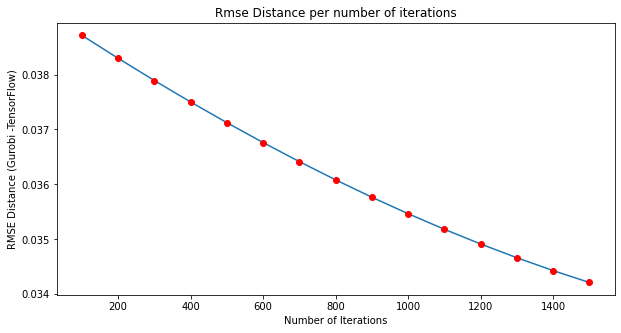

N_ITER        RMSE_DISTANCE
100           0.0387126184991589
200           0.03829487459315297
300           0.03789045589684071
400           0.03749978843776705
500           0.03712330610489105
600           0.0367614306767082
700           0.036414461499619605
800           0.03608279542155639
900           0.03576682654527487
1000          0.035466835131810315
1100          0.03518314988095186
1200          0.034915908775927824
1300          0.03466540296314425
1400          0.03443161129482217
1500          0.034214710811203614


In [10]:
path = "../../../log/Prove-4/Virginica/c1_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

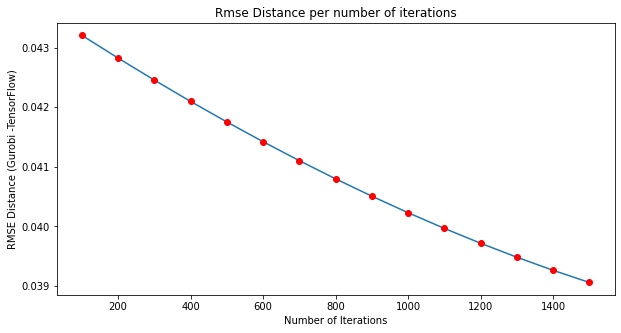

N_ITER        RMSE_DISTANCE
100           0.043206440723218276
200           0.04282440855219199
300           0.0424547043508306
400           0.04209751576355045
500           0.041753026097540495
600           0.04142152860925734
700           0.04110333618293059
800           0.040798699878067744
900           0.04050767862746786
1000          0.04023043201378221
1100          0.03996718785287244
1200          0.0397182224177863
1300          0.03948380075034541
1400          0.039264183250674246
1500          0.03905961503873431


In [11]:
path = "../../../log/Prove-4/Virginica/c1_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


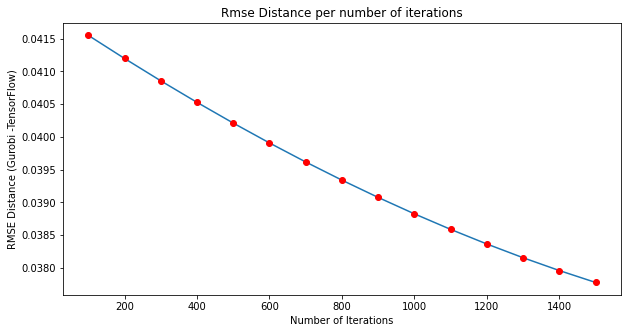

N_ITER        RMSE_DISTANCE
100           0.04154921538844287
200           0.04119632833194091
300           0.04085551607059946
400           0.04052691761174955
500           0.04021076995373608
600           0.039907365349119546
700           0.03961698523098212
800           0.03933979341850448
900           0.03907594106722332
1000          0.038825503888647944
1100          0.03858854565128307
1200          0.0383652482371767
1300          0.03815574029934095
1400          0.037960168049244916
1500          0.03777872968772111


In [12]:
path = "../../../log/Prove-4/Virginica/c1_sigma05_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

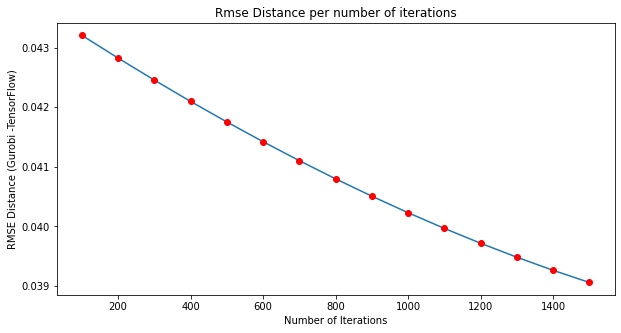

N_ITER        RMSE_DISTANCE
100           0.043206440723218276
200           0.04282440855219199
300           0.0424547043508306
400           0.04209751576355045
500           0.041753026097540495
600           0.04142152860925734
700           0.04110333618293059
800           0.040798699878067744
900           0.04050767862746786
1000          0.04023043201378221
1100          0.03996718785287244
1200          0.0397182224177863
1300          0.03948380075034541
1400          0.039264183250674246
1500          0.03905961503873431


In [13]:
path = "../../../log/Prove-4/Virginica/c1_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

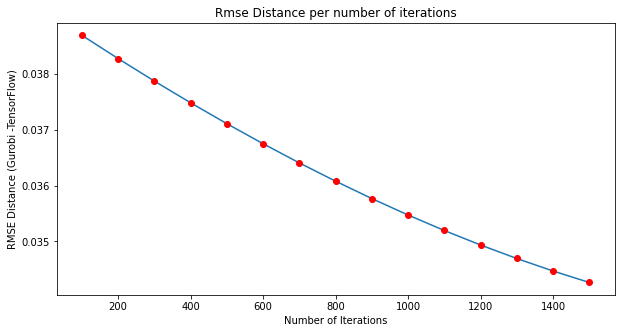

N_ITER        RMSE_DISTANCE
100           0.038690583228049184
200           0.03827408043528325
300           0.037871301768882315
400           0.03748268812526254
500           0.037108685510360194
600           0.0367497386511935
700           0.03640629435179443
800           0.03607879457596593
900           0.03576767729529579
1000          0.0354733419306114
1100          0.035196068602250066
1200          0.03493624765218301
1300          0.034694271208696184
1400          0.03447051399697497
1500          0.03426528853772873


In [14]:
path = "../../../log/Prove-4/Virginica/c75_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


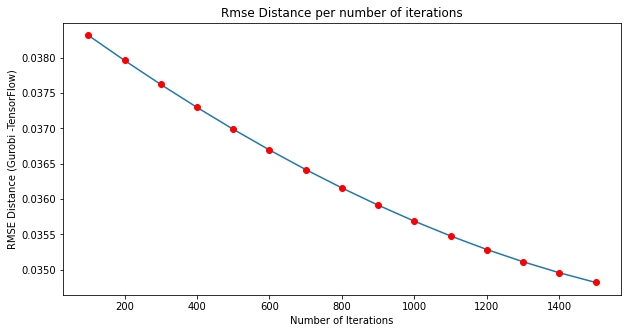

N_ITER        RMSE_DISTANCE
100           0.03831600488768679
200           0.03796127125274367
300           0.037621423196243065
400           0.03729673563363708
500           0.03698757708257059
600           0.03669433957364914
700           0.03641733130392685
800           0.036156818372717316
900           0.035913159115988136
1000          0.03568668172238153
1100          0.03547757693990207
1200          0.035286120845288114
1300          0.03511260208866913
1400          0.034957268714611585
1500          0.03482018774620165


In [15]:
path = "../../../log/Prove-4/Virginica/c75_sigma01_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

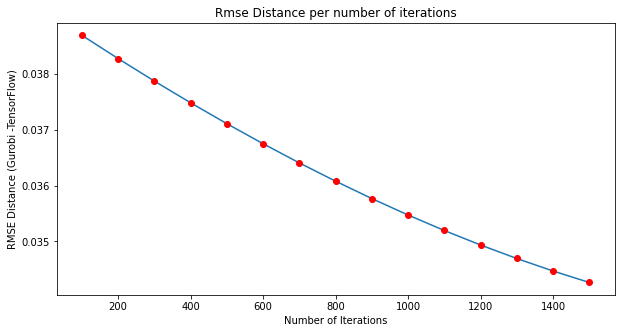

N_ITER        RMSE_DISTANCE
100           0.038690583228049184
200           0.03827408043528325
300           0.037871301768882315
400           0.03748268812526254
500           0.037108685510360194
600           0.0367497386511935
700           0.03640629435179443
800           0.03607879457596593
900           0.03576767729529579
1000          0.0354733419306114
1100          0.035196068602250066
1200          0.03493624765218301
1300          0.034694271208696184
1400          0.03447051399697497
1500          0.03426528853772873


In [16]:
path = "../../../log/Prove-4/Virginica/c75_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

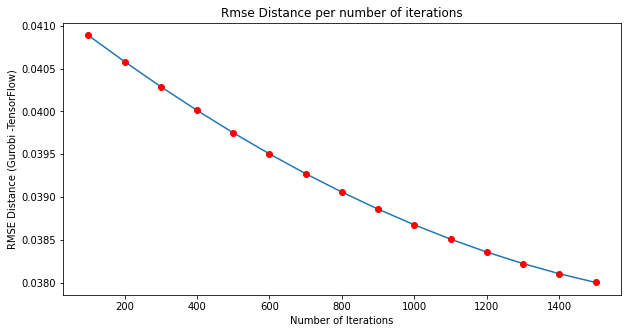

N_ITER        RMSE_DISTANCE
100           0.04088722070980893
200           0.040580949188468295
300           0.040289208491279406
400           0.04001231615152689
500           0.039750582461375195
600           0.039504305878227265
700           0.03927366841771295
800           0.03905881744924069
900           0.03885989820668751
1000          0.0386769881303938
1100          0.03851014899222849
1200          0.03835945150834683
1300          0.038225056577074305
1400          0.03810702556669055
1500          0.03800528551030124


In [17]:
path = "../../../log/Prove-4/Virginica/c75_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


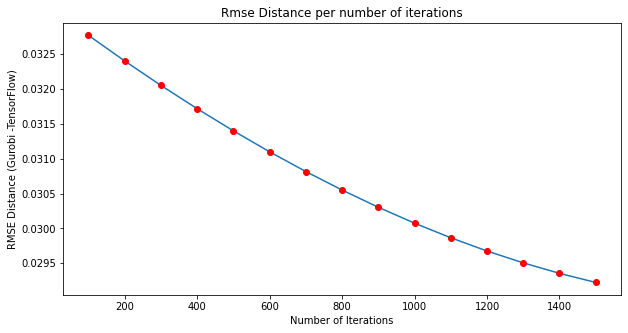

N_ITER        RMSE_DISTANCE
100           0.03277050438409562
200           0.03240339725414008
300           0.03205240353236096
400           0.03171784279227271
500           0.0313999064647567
600           0.031099019153957647
700           0.03081551962535081
800           0.030549872078916934
900           0.03030254462307519
1000          0.03007398903268265
1100          0.02986463421589654
1200          0.029674731241433938
1300          0.02950440723743241
1400          0.029353868791722793
1500          0.029223200857337876


In [18]:
path = "../../../log/Prove-4/Virginica/c75_sigma025_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

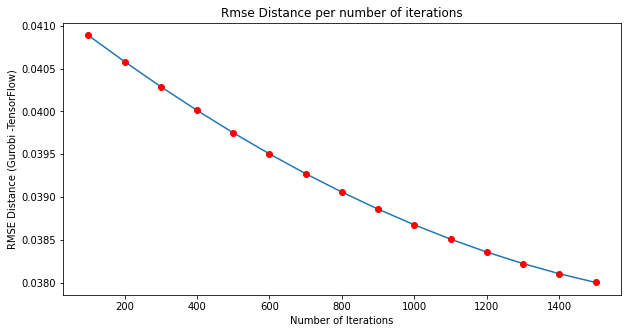

N_ITER        RMSE_DISTANCE
100           0.04088722070980893
200           0.040580949188468295
300           0.040289208491279406
400           0.04001231615152689
500           0.039750582461375195
600           0.039504305878227265
700           0.03927366841771295
800           0.03905881744924069
900           0.03885989820668751
1000          0.0386769881303938
1100          0.03851014899222849
1200          0.03835945150834683
1300          0.038225056577074305
1400          0.03810702556669055
1500          0.03800528551030124


In [19]:
path = "../../../log/Prove-4/Virginica/c75_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

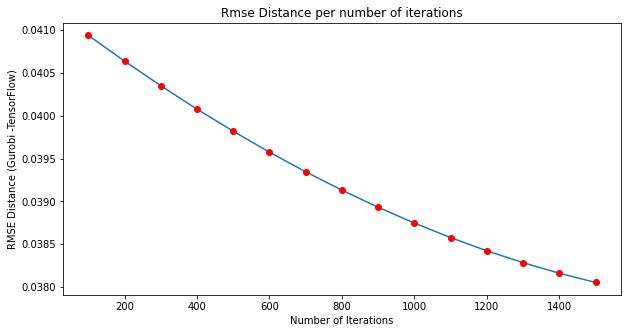

N_ITER        RMSE_DISTANCE
100           0.04093817296047228
200           0.040637219582116364
300           0.04035011650540261
400           0.04007715308465243
500           0.039818617284750314
600           0.039574730393712315
700           0.039345473335478186
800           0.03913093943986217
900           0.03893133466049337
1000          0.03874675619772084
1100          0.03857737151067728
1200          0.038423243045307795
1300          0.03828452858830066
1400          0.038161385463467035
1500          0.0380539531428265


In [20]:
path = "../../../log/Prove-4/Virginica/c75_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


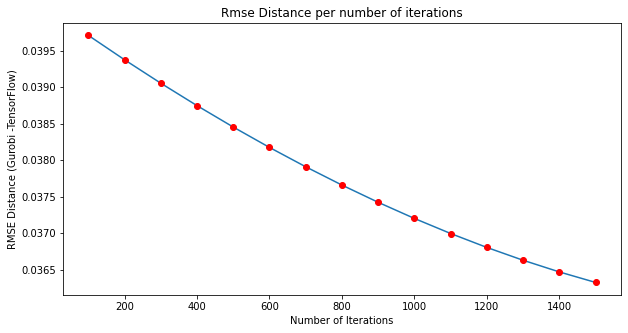

N_ITER        RMSE_DISTANCE
100           0.039709879093962216
200           0.039375485763213224
300           0.039054476874772245
400           0.03874715891883236
500           0.038453725731597686
600           0.038174395455549855
700           0.037909322943781985
800           0.03765867218219761
900           0.03742260755892184
1000          0.03720131650429581
1100          0.03699504788671667
1200          0.03680403481547557
1300          0.03662849081858292
1400          0.03646860984062215
1500          0.03632456357002009


In [21]:
path = "../../../log/Prove-4/Virginica/c75_sigma05_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

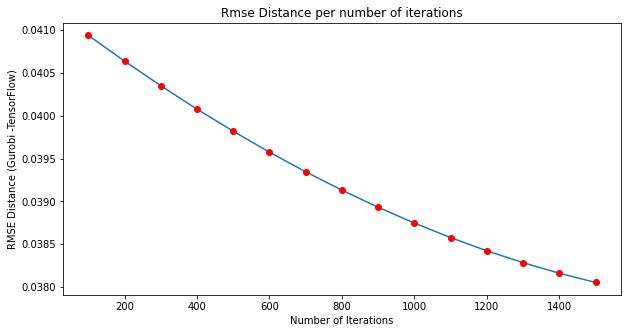

N_ITER        RMSE_DISTANCE
100           0.04093817296047228
200           0.040637219582116364
300           0.04035011650540261
400           0.04007715308465243
500           0.039818617284750314
600           0.039574730393712315
700           0.039345473335478186
800           0.03913093943986217
900           0.03893133466049337
1000          0.03874675619772084
1100          0.03857737151067728
1200          0.038423243045307795
1300          0.03828452858830066
1400          0.038161385463467035
1500          0.0380539531428265


In [22]:
path = "../../../log/Prove-4/Virginica/c75_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

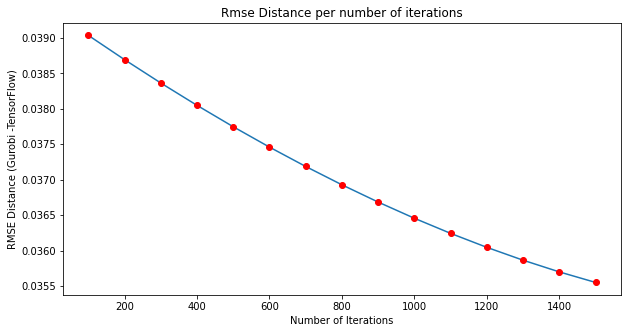

N_ITER        RMSE_DISTANCE
100           0.0390369517291264
200           0.03869407418861506
300           0.03836463493478905
400           0.03804887198603402
500           0.03774706592039013
600           0.03745946986457239
700           0.03718616145453545
800           0.036927436291524826
900           0.036683602959819504
1000          0.03645496217701696
1100          0.03624180000588238
1200          0.036044390433198514
1300          0.03586299375375418
1400          0.03569785434644356
1500          0.03554919831228781


In [23]:
path = "../../../log/Prove-4/Virginica/c200_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


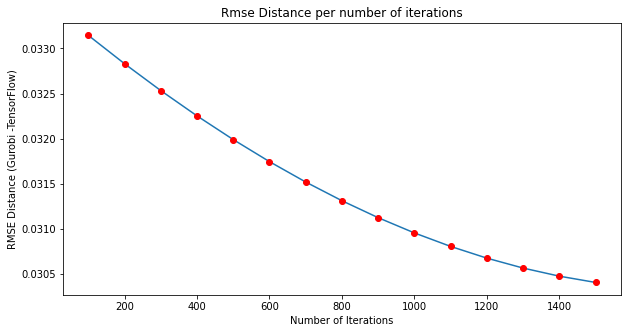

N_ITER        RMSE_DISTANCE
100           0.03314529905710974
200           0.03283052560197585
300           0.032532577416396764
400           0.03225192093258231
500           0.03198901218824005
600           0.03174429137796656
700           0.031518095392245496
800           0.03131070158597512
900           0.031122407951157668
1000          0.030953279148734053
1100          0.030803561541548737
1200          0.03067353909127067
1300          0.030563463323875016
1400          0.030473550304926104
1500          0.03040397813561803


In [24]:
path = "../../../log/Prove-4/Virginica/c200_sigma01_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

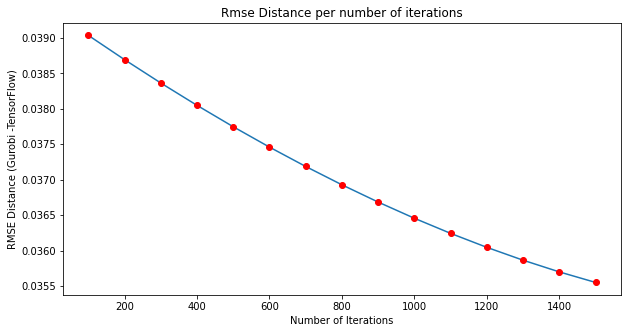

N_ITER        RMSE_DISTANCE
100           0.0390369517291264
200           0.03869407418861506
300           0.03836463493478905
400           0.03804887198603402
500           0.03774706592039013
600           0.03745946986457239
700           0.03718616145453545
800           0.036927436291524826
900           0.036683602959819504
1000          0.03645496217701696
1100          0.03624180000588238
1200          0.036044390433198514
1300          0.03586299375375418
1400          0.03569785434644356
1500          0.03554919831228781


In [25]:
path = "../../../log/Prove-4/Virginica/c200_sigma01_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

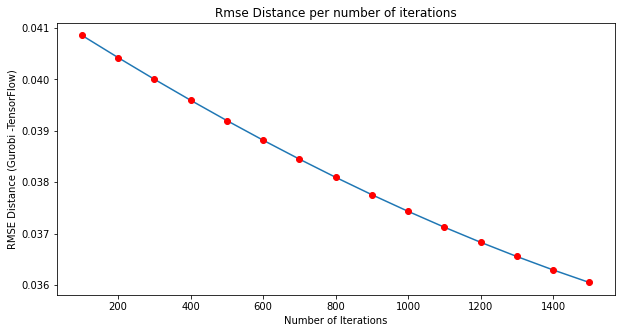

N_ITER        RMSE_DISTANCE
100           0.040856156541159365
200           0.040423054480299724
300           0.04000240933814134
400           0.03959452160931944
500           0.03919971901223929
600           0.03881839952692627
700           0.038450964139553664
800           0.03809781530361123
900           0.03775935367727469
1000          0.03743593842452527
1100          0.03712771482951443
1200          0.0368349916440186
1300          0.03655814100441553
1400          0.0362975190763244
1500          0.03605334727924647


In [26]:
path = "../../../log/Prove-4/Virginica/c200_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


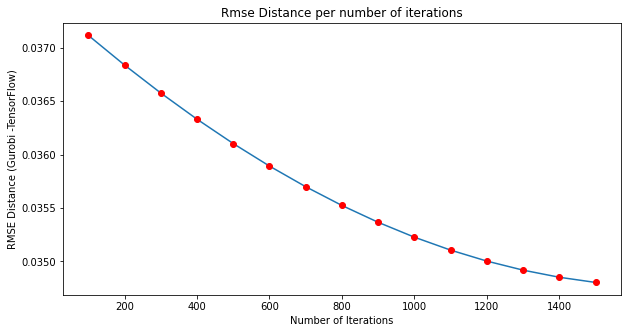

N_ITER        RMSE_DISTANCE
100           0.03711543308146153
200           0.036837416774334296
300           0.036575873779577
400           0.03633098696695015
500           0.036103059961550325
600           0.035892415661975
700           0.035699281639199755
800           0.035523834898835066
900           0.03536633809829637
1000          0.035227026594744804
1100          0.03510599017401643
1200          0.03500328089236348
1300          0.03491868966177979
1400          0.03485214034159085
1500          0.034803629819109255


In [27]:
path = "../../../log/Prove-4/Virginica/c200_sigma025_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

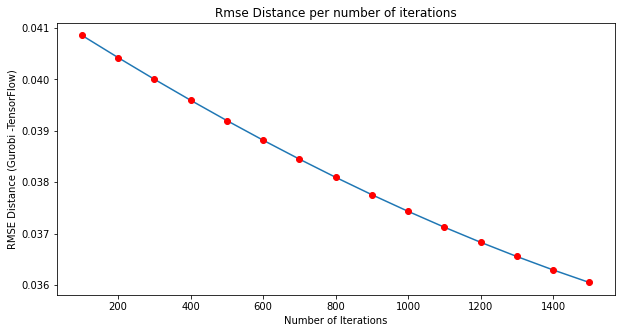

N_ITER        RMSE_DISTANCE
100           0.040856156541159365
200           0.040423054480299724
300           0.04000240933814134
400           0.03959452160931944
500           0.03919971901223929
600           0.03881839952692627
700           0.038450964139553664
800           0.03809781530361123
900           0.03775935367727469
1000          0.03743593842452527
1100          0.03712771482951443
1200          0.0368349916440186
1300          0.03655814100441553
1400          0.0362975190763244
1500          0.03605334727924647


In [28]:
path = "../../../log/Prove-4/Virginica/c200_sigma025_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

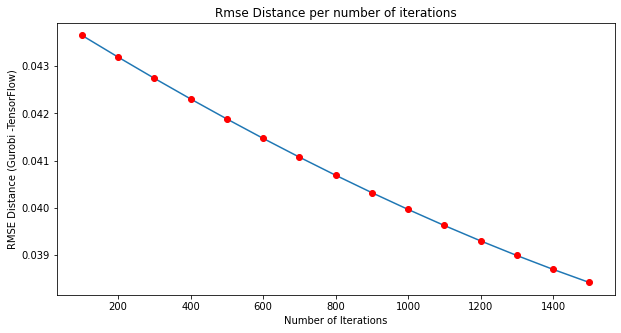

N_ITER        RMSE_DISTANCE
100           0.04365106261032202
200           0.043189782666532055
300           0.042740763213295965
400           0.04230432728478628
500           0.04188063573467495
600           0.04147005454851227
700           0.04107297399798753
800           0.04068972192283664
900           0.04032047527824392
1000          0.03996556940896017
1100          0.0396253868235482
1200          0.0393003074149767
1300          0.038990703485993636
1400          0.038696943858380475
1500          0.03841938739014142


In [29]:
path = "../../../log/Prove-4/Virginica/c200_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


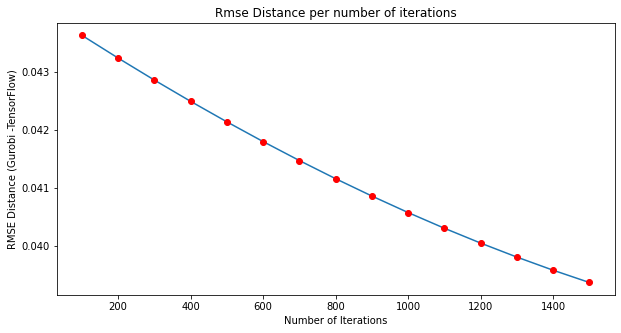

N_ITER        RMSE_DISTANCE
100           0.04362372698488233
200           0.04323291305103102
300           0.042854811225904545
400           0.04248959020579369
500           0.04213734870122447
600           0.04179827401969865
700           0.04147266295455145
800           0.041160795783518354
900           0.04086285083096292
1000          0.04057899452822199
1100          0.04030946337978447
1200          0.04005448585285507
1300          0.03981405196997824
1400          0.03958822878673819
1500          0.03937720622328162


In [30]:
path = "../../../log/Prove-4/Virginica/c200_sigma05_penalization05_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

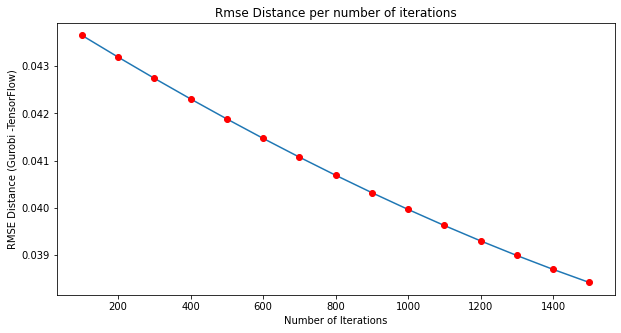

N_ITER        RMSE_DISTANCE
100           0.04365106261032202
200           0.043189782666532055
300           0.042740763213295965
400           0.04230432728478628
500           0.04188063573467495
600           0.04147005454851227
700           0.04107297399798753
800           0.04068972192283664
900           0.04032047527824392
1000          0.03996556940896017
1100          0.0396253868235482
1200          0.0393003074149767
1300          0.038990703485993636
1400          0.038696943858380475
1500          0.03841938739014142


In [31]:
path = "../../../log/Prove-4/Virginica/c200_sigma05_penalization1_1e-05.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)